## AmExpert 19

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
test = pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/test.csv')
train = pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/train.csv')
campaign_data = pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/campaign_data.csv')
coupon_item_mapping =  pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/customer_demographics.csv')
transactions =  pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/customer_transaction_data.csv')
item_data =  pd.read_csv('/content/drive/My Drive/DS Projects/AmExpert-19/item_data.csv')


In [188]:
customer_transaction_data.nunique()

date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
dtype: int64

In [189]:
test.shape,train.shape

((50226, 4), (78369, 5))

In [190]:
df = train
df.tail()
df.nunique()

id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
dtype: int64

In [0]:
test_ids = test['id'].values

In [192]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [0]:
## Convert start and end date to datetime

dateparser = lambda x : pd.datetime.strptime(x,"%d/%m/%y")
campaign_data['start_date'] = campaign_data['start_date'].apply(dateparser)
campaign_data['end_date'] = campaign_data['end_date'].apply(dateparser)

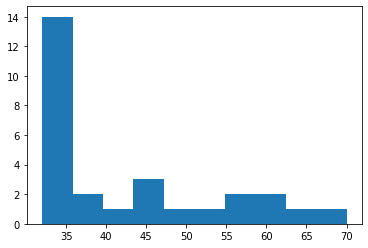

In [194]:
campaign_data['campaign_duration']= (campaign_data['end_date'] - campaign_data['start_date']).dt.days
plt.hist(campaign_data['campaign_duration'])
plt.show()

In [195]:
campaign_data.drop(['start_date','end_date'],axis =1, inplace = True)
campaign_data.head()

,campaign_id,campaign_type,campaign_duration
0,24,Y,60
1,25,Y,32
2,20,Y,70
3,23,Y,38
4,21,Y,32


In [196]:
le = LabelEncoder()
campaign_data['campaign_type'] = le.fit_transform(campaign_data['campaign_type'])
campaign_data.head()

,campaign_id,campaign_type,campaign_duration
0,24,1,60
1,25,1,32
2,20,1,70
3,23,1,38
4,21,1,32


In [197]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [198]:
for col in item_data.columns[1:] : 
  print(f"{col} : \n \t nunique : {item_data[col].nunique()} \t unique : {item_data[col].unique()}")

brand : 
 	 nunique : 5528 	 unique : [   1   56   11 ... 5463 2997 3360]
brand_type : 
 	 nunique : 2 	 unique : ['Established' 'Local']
category : 
 	 nunique : 19 	 unique : ['Grocery' 'Miscellaneous' 'Bakery' 'Pharmaceutical' 'Packaged Meat'
 'Seafood' 'Natural Products' 'Dairy, Juices & Snacks' 'Prepared Food'
 'Skin & Hair Care' 'Meat' 'Travel' 'Flowers & Plants' 'Fuel' 'Salads'
 'Alcohol' 'Garden' 'Restauarant' 'Vegetables (cut)']


In [0]:
le = LabelEncoder()
for col in ['brand_type','category'] : 
  item_data[col] = le.fit_transform(item_data[col])

In [200]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,0,6
1,2,1,0,8
2,3,56,1,1
3,4,56,1,6
4,5,56,1,6


In [201]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [202]:
for col in customer_demographics.columns[1:] : 
  print(f"{col} : \n \t nunique : {customer_demographics[col].nunique()} \t unique : {customer_demographics[col].unique()}")

age_range : 
 	 nunique : 6 	 unique : ['70+' '46-55' '26-35' '36-45' '18-25' '56-70']
marital_status : 
 	 nunique : 2 	 unique : ['Married' nan 'Single']
rented : 
 	 nunique : 2 	 unique : [0 1]
family_size : 
 	 nunique : 5 	 unique : ['2' '3' '4' '1' '5+']
no_of_children : 
 	 nunique : 3 	 unique : [nan '1' '2' '3+']
income_bracket : 
 	 nunique : 12 	 unique : [ 4  5  3  6  1  7  2  8  9 12 10 11]


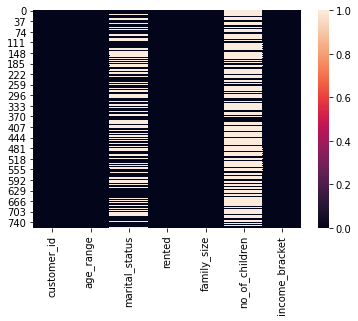

In [203]:
sns.heatmap(customer_demographics.isnull())
plt.show()

In [0]:
customer_demographics['no_of_children'].fillna('0',inplace=True)

In [205]:
customer_demographics['no_of_children'].value_counts()

0     538
1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [206]:
customer_demographics['no_of_children'].isnull().sum()

0

In [207]:
customer_demographics['marital_status'].isnull().sum()

329

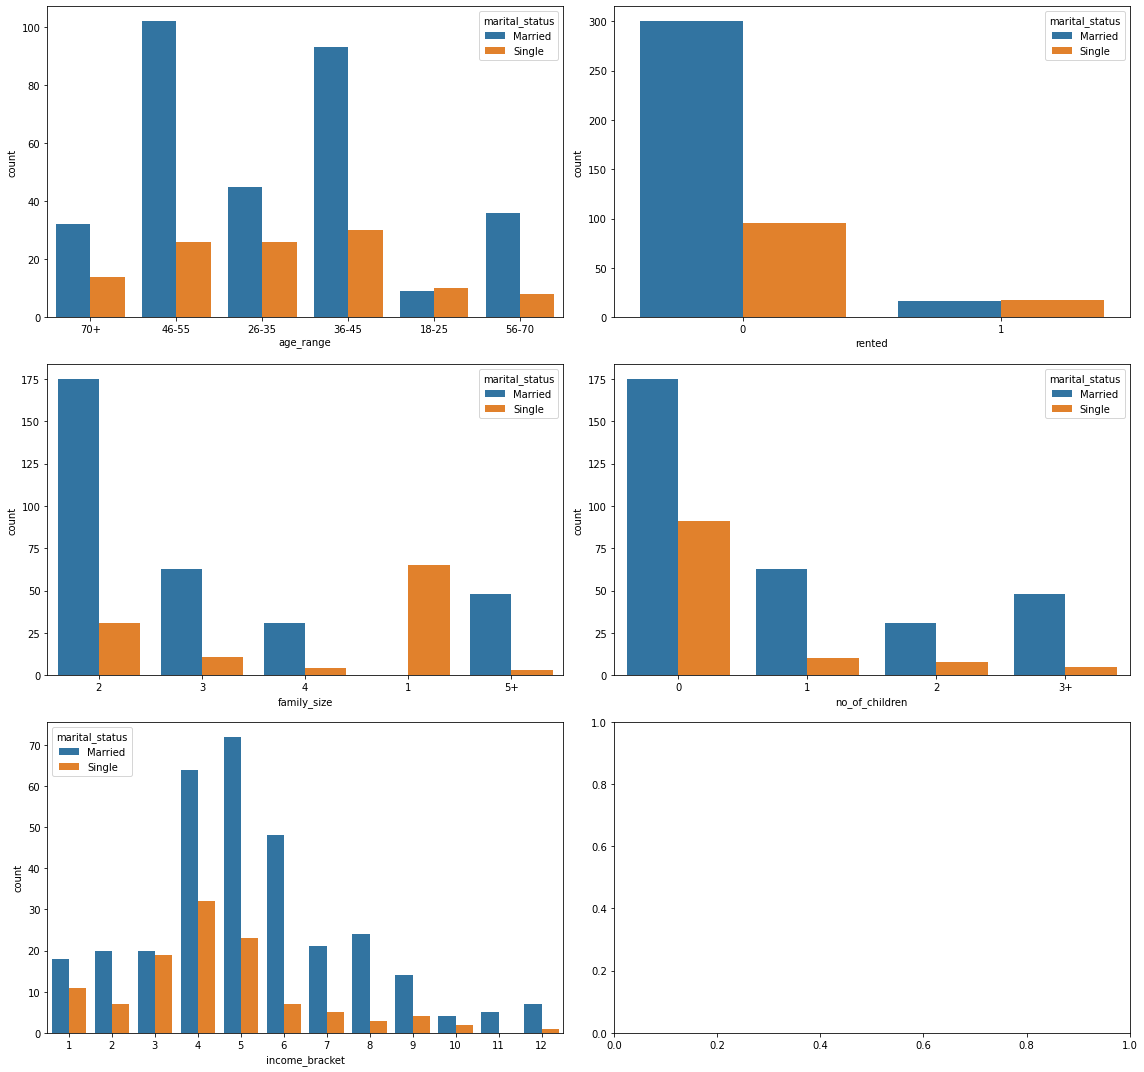

In [208]:
fig,ax = plt.subplots(3,2,figsize=(16,15))
ax = ax.flatten()
ax_i = 0
for col in customer_demographics.columns[1:]:
    if col != 'marital_status':
        sns.countplot(x=col,hue='marital_status',data=customer_demographics,ax=ax[ax_i])
        ax_i = ax_i+1

plt.tight_layout()
plt.show()

In [0]:
customer_demographics.loc[customer_demographics['family_size']=='5+','family_size'] = 5
customer_demographics.loc[customer_demographics['no_of_children']=='3+','no_of_children'] = 3

customer_demographics['family_size'] = customer_demographics['family_size'].astype(int)
customer_demographics['no_of_children'] = customer_demographics['no_of_children'].astype(int)

In [210]:
customer_demographics['no_of_children'].unique()

array([0, 1, 2, 3])

In [0]:
customer_demographics.loc[customer_demographics['marital_status'].isnull() & 
            (customer_demographics['family_size'] - customer_demographics['no_of_children'] == 1), 'marital_status'] = 'Single'

customer_demographics.loc[customer_demographics['marital_status'].isnull() & 
            (customer_demographics['family_size'] - customer_demographics['no_of_children'] == 2), 'marital_status'] = 'Married'

In [212]:
customer_demographics['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [0]:
le = LabelEncoder()
customer_demographics['marital_status'] = le.fit_transform(customer_demographics['marital_status'])

In [0]:
customer_demographics['age_range'] = customer_demographics['age_range'].str.replace('+','-70')
customer_demographics['age_range'] = customer_demographics['age_range'].apply( lambda s : int((int(s[:2]) + int(s[-2:])) / 2) )

In [215]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null int64
marital_status    760 non-null int64
rented            760 non-null int64
family_size       760 non-null int64
no_of_children    760 non-null int64
income_bracket    760 non-null int64
dtypes: int64(7)
memory usage: 41.7 KB


In [216]:
transactions.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [0]:
dateparser = lambda x : pd.datetime.strptime(x,"%Y-%m-%d")
transactions['date'] = transactions['date'].apply(dateparser)

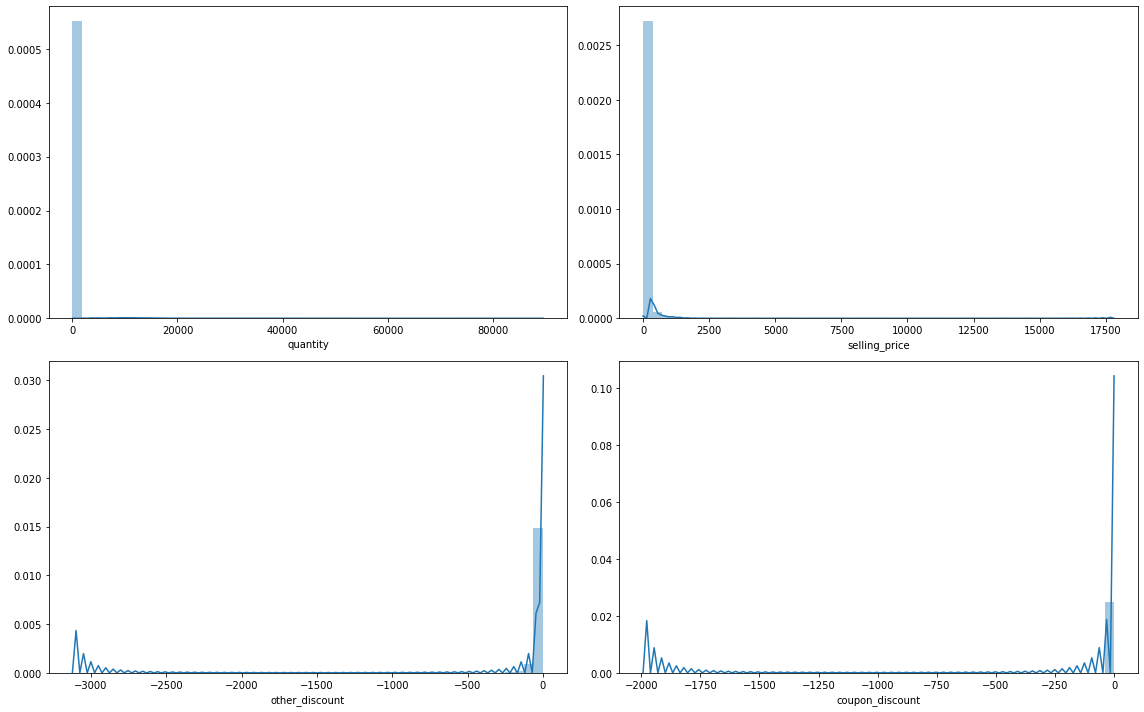

In [218]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
ax = ax.flatten()
for i,col in enumerate(['quantity', 'selling_price', 'other_discount', 'coupon_discount']):
    sns.distplot(transactions[col],ax=ax[i])
plt.tight_layout()
plt.show()

In [219]:
campaign_features = pd.concat([train,test]).groupby('campaign_id').agg({'coupon_id':pd.Series.nunique,'customer_id':pd.Series.nunique})
campaign_features.rename(columns={'coupon_id':'coupons_nunique', 'customer_id':'customers_nunique'},inplace=True)

campaign_features = pd.merge(campaign_data, campaign_features, on='campaign_id', how='inner')
campaign_features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,campaign_id,campaign_type,campaign_duration,coupons_nunique,customers_nunique
0,24,1,60,2,100
1,25,1,32,17,187
2,20,1,70,24,244
3,23,1,38,18,183
4,21,1,32,16,65


In [220]:
coupon_items = pd.merge(coupon_item_mapping, item_data, on='item_id', how='inner')
coupon_items.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,1,6
1,6,37,56,1,6
2,22,37,56,1,6
3,31,37,56,1,6
4,107,75,56,1,6


In [222]:
num_unique = pd.Series.nunique
aggfunc = {'item_id':num_unique, 'brand': num_unique, 'category':num_unique, 'brand_type':'mean'}
coupons = coupon_items.groupby('coupon_id').agg(aggfunc).reset_index()
coupons.rename(columns={'item_id':'coupon_item_nunique', 'brand':'coupon_brand_nunique',
                        'brand_type':'coupon_established_mean', 
                        'category':'coupon_category_nunique'},inplace=True)
coupons.head()

,coupon_id,coupon_item_nunique,coupon_brand_nunique,coupon_category_nunique,coupon_established_mean
0,1,39,3,2,0.0
1,2,2,1,1,0.0
2,3,17,2,1,0.0
3,4,24,1,1,0.0
4,5,7,1,1,0.0


In [223]:
transaction_items = pd.merge(transactions, item_data, on='item_id', how='inner')
transaction_items.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,1,9
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,1,9
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,56,1,9
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,56,1,9
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,56,1,9


In [224]:
aggfunc = {
    'date':num_unique, 'quantity':['sum','mean'], 'selling_price':['sum','mean'],
    'other_discount':['sum','mean'], 'coupon_discount':['sum','mean']}
customer_purchases = transaction_items.groupby('customer_id').agg(aggfunc).reset_index()
customer_purchases.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


customer_id    date quantity  ... other_discount coupon_discount          
              nunique      sum  ...           mean             sum      mean
0           1      56     1227  ...     -16.250382        -2116.83 -2.019876
1           2      37      474  ...     -16.830430         -249.34 -0.595084
2           3      41     8163  ...     -22.714227        -2179.54 -3.091546
3           4      26      280  ...     -13.305409          -89.05 -0.404773
4           5     163    93353  ...     -13.657917          -90.83 -0.114684

[5 rows x 10 columns]

In [226]:
customer_purchases.columns = ['customer_id', 'date_nunique', 'quantity_sum', 'quantity_mean', 
                          'selling_price_sum', 'selling_price_mean', 'other_discount_sum', 'other_discount_mean',
                          'coupon_discount_sum', 'coupon_discount_mean']
customer_purchases.head()

,customer_id,date_nunique,quantity_sum,quantity_mean,selling_price_sum,selling_price_mean,other_discount_sum,other_discount_mean,coupon_discount_sum,coupon_discount_mean
0,1,56,1227,1.170802,98513.93,94.001842,-17030.40,-16.250382,-2116.83,-2.019876
1,2,37,474,1.131265,43100.03,102.864033,-7051.95,-16.830430,-249.34,-0.595084
2,3,41,8163,11.578723,73050.27,103.617404,-16013.53,-22.714227,-2179.54,-3.091546
3,4,26,280,1.272727,33973.22,154.423727,-2927.19,-13.305409,-89.05,-0.404773
4,5,163,93353,117.869949,103615.10,130.827146,-10817.07,-13.657917,-90.83,-0.114684


In [228]:

print('Number of unique customer_id in all the tables:')
print('Train :', train['customer_id'].nunique())
print('Test :', test['customer_id'].nunique())
print('Transactions :', transactions['customer_id'].nunique())
print('Demographics :', customer_demographics['customer_id'].nunique())

Number of unique customer_id in all the tables:
Train : 1428
Test : 1250
Transactions : 1582
Demographics : 760


In [229]:
mtrain = pd.merge(train, campaign_features, on='campaign_id', how='left')
mtrain = pd.merge(mtrain, coupons, on='coupon_id', how='left')
mtrain = pd.merge(mtrain, customer_purchases, on='customer_id', how='left')
mtrain.shape

(78369, 22)

In [230]:
mtest = pd.merge(test, campaign_features, on='campaign_id', how='left')
mtest = pd.merge(mtest, coupons, on='coupon_id', how='left')
mtest = pd.merge(mtest, customer_purchases, on='customer_id', how='left')
mtest.shape

(50226, 21)

In [0]:
drop_ids = ['id','campaign_id','coupon_id','customer_id']
mtrain.drop(drop_ids,axis=1,inplace=True)
mtest.drop(drop_ids,axis=1,inplace=True)

In [0]:
x = mtrain.drop('redemption_status',axis=1)
y = mtrain['redemption_status']

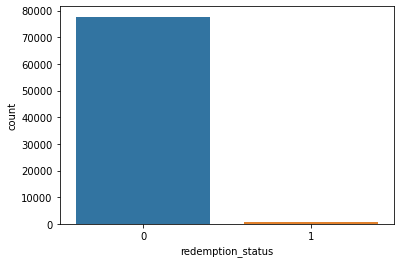

In [233]:
sns.countplot(y)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

def disp_confusion_matrix(model, x, y):
    ypred = model.predict(x)
    cm = confusion_matrix(y,ypred)
    ax = sns.heatmap(cm,annot=True,fmt='d')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =',precision)
    print('Recall =',recall)
    print('F1 Score =',f1)

def disp_roc_curve(model, xtest, ytest):
    yprob = model.predict_proba(xtest)
    fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
    roc_auc = roc_auc_score(ytest,yprob[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
print(f'Training set score = {logreg.score(xtrain,ytrain)}')
print(f'Test set score = {logreg.score(xtest,ytest)}')

Training set score = 0.9905233428610317
Test set score = 0.9901495432042056


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


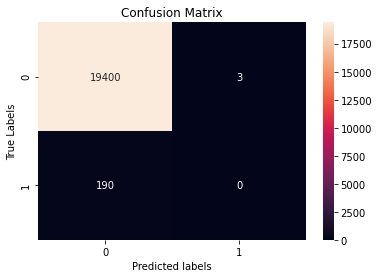

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


Accuracy = 0.9901495432042056
Precision = 0.0
Recall = 0.0
F1 Score = nan
ROC AUC = 0.4446340365163282


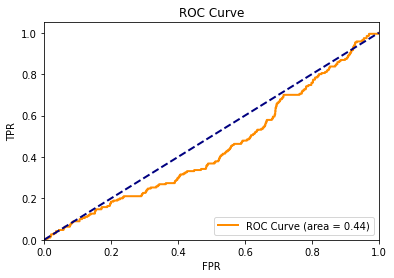

In [242]:
disp_confusion_matrix(logreg, xtest, ytest)
disp_roc_curve(logreg, xtest, ytest)

Random Forest


In [243]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
print('Training set score = {:.3f}'.format(rf.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(rf.score(xtest,ytest)))

Training set score = 0.999
Test set score = 0.988


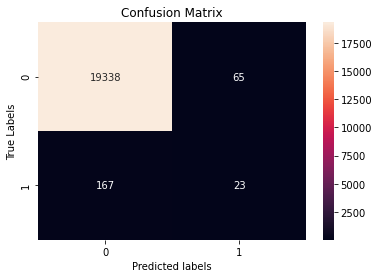

Accuracy = 0.9881590363905477
Precision = 0.26136363636363635
Recall = 0.12105263157894737
F1 Score = 0.16546762589928057
ROC AUC = 0.8312634779754623


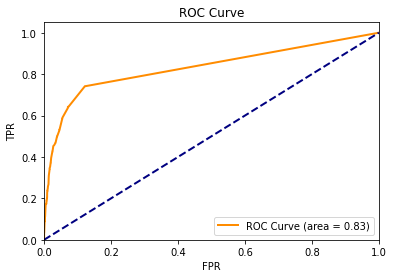

In [245]:
disp_confusion_matrix(rf, xtest, ytest)
disp_roc_curve(rf, xtest, ytest)

In [246]:
pd.DataFrame({'Features':x.columns, 'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)

,Features,Importance
4,coupon_item_nunique,0.412837
15,coupon_discount_sum,0.059472
16,coupon_discount_mean,0.047073
5,coupon_brand_nunique,0.045714
12,selling_price_mean,0.041193
11,selling_price_sum,0.039578
13,other_discount_sum,0.039492
8,date_nunique,0.039086
10,quantity_mean,0.038505
9,quantity_sum,0.038256


In [0]:
rf.fit(x,y)
test_prob = rf.predict_proba(mtest)[:,1]
df_rf = pd.DataFrame({'id':test_ids,'redemption_status':test_prob})

In [251]:
df_rf.head()

,id,redemption_status
0,3,0.01
1,4,0.02
2,5,0.00
3,8,0.00
4,10,0.00
